In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max.colwidth', 100)

data_path = '/opt/ml/input/data/train/'

train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv'))

title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')

genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [6]:
train_df.sample(10)

,user,item,time
282610,7487,26400,1366426588
1889525,50159,6350,1329765713
1940158,51507,2406,1166102667
1428233,37694,33162,1169800308
1077484,28429,5502,1243020466
3402411,90669,1079,1228170434
4010063,107111,123,1306443372
4153597,111205,922,1131686045
1475675,38988,328,1123529095
3898165,103941,3793,1317405847


In [2]:
print('고유 train_df user 수:',train_df.user.nunique())
print('고유 train_df item 수:',train_df.item.nunique())
print('고유 train_df time 수:',train_df.time.nunique())

고유 train_df user 수: 31360
고유 train_df item 수: 6807
고유 train_df time 수: 5074973


In [7]:
train_df['user'].value_counts()

8405      2912
54465     1980
24219     1842
32514     1830
91349     1795
          ... 
11211       32
128756      28
105578      22
68606       19
53188       16
Name: user, Length: 31360, dtype: int64

In [9]:
# 병합용 'all_train' df 생성
all_train = train_df.copy()
all_train.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [10]:
all_train['time_date'] = pd.to_datetime(all_train['time'], unit='s')
all_train['time_year'] = all_train['time_date'].dt.year
all_train['time_month'] = all_train['time_date'].dt.month
all_train['time_hour'] = all_train['time_date'].dt.hour
all_train['time_day'] = all_train['time_date'].dt.dayofweek
all_train.head()

,user,item,time,time_date,time_year,time_month,time_hour,time_day
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,4,3
1,11,170,1230782534,2009-01-01 04:02:14,2009,1,4,3
2,11,531,1230782539,2009-01-01 04:02:19,2009,1,4,3
3,11,616,1230782542,2009-01-01 04:02:22,2009,1,4,3
4,11,2140,1230782563,2009-01-01 04:02:43,2009,1,4,3


In [11]:
# 최소, 최대 일자 출력
print(all_train['time_date'].min())
print(all_train['time_date'].max())

2005-04-11 11:56:25
2015-03-31 05:50:52


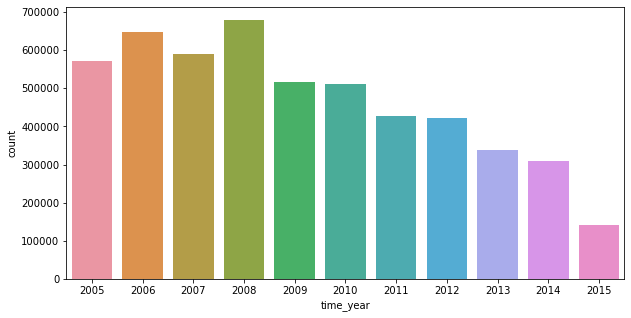

In [13]:
# 시각화 : 연도별 time 컬럼 플롯 시각화
plt.figure(figsize=(10,5))
sns.countplot(x=all_train['time_year'])
plt.show()

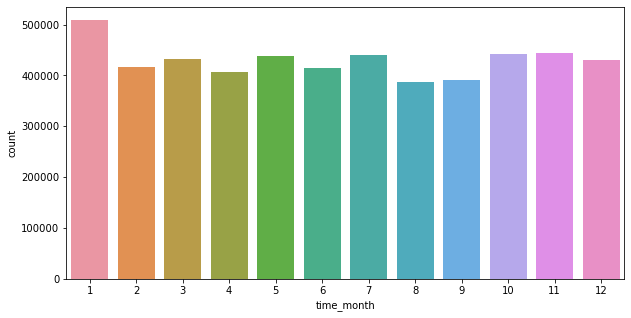

In [15]:
# 시각화 : 월별 time 컬럼 플롯 시각화
plt.figure(figsize=(10,5))
sns.countplot(x=all_train['time_month'])
plt.show()

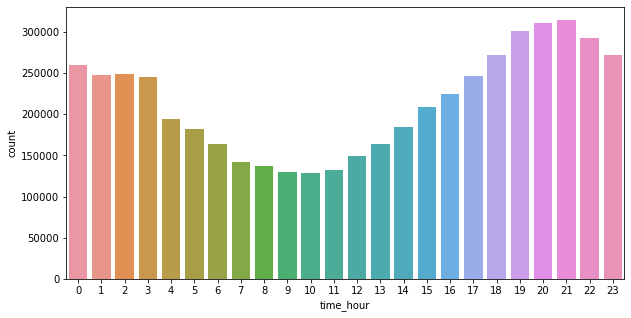

In [16]:
# 시각화 : 시간별 time 컬럼 플롯 시각화
plt.figure(figsize=(10,5))
sns.countplot(x=all_train['time_hour'])
plt.show()

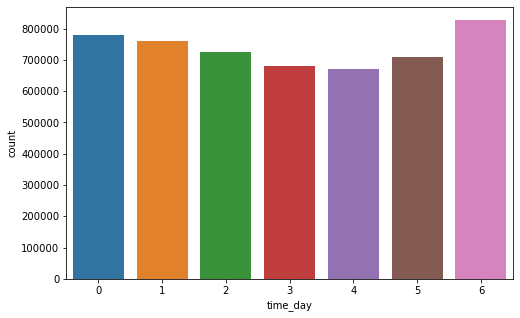

In [17]:
# 시각화 : 요일별 time 컬럼 플롯 시각화
plt.figure(figsize=(8,5))
sns.countplot(x=all_train['time_day'])
plt.show()

### titles

해당 영화의 제목

영화 제목이 같은 영화 존재

34048, 64997에서 동일한 이름의 War of the Worlds (2005) 영화 발견

결측치 없음

In [18]:
print('고유 title_data item 수:',title_data.item.nunique())

고유 title_data item 수: 6807


In [21]:
all_train.item.head()

0    4643
1     170
2     531
3     616
4    2140
Name: item, dtype: int64

In [22]:
title_data.item.head()

0     318
1    2571
2    2959
3     296
4     356
Name: item, dtype: int64

In [19]:
# 모든 영화(item)에 제목(title)이 존재하는지 확인
set(all_train.item) == set(title_data.item)

True

In [23]:
# 데이터 추가 : titles
all_train = pd.merge(all_train,title_data)
all_train

,user,item,time,time_date,time_year,time_month,time_hour,time_day,title
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,4,3,Planet of the Apes (2001)
1,189,4643,1302945016,2011-04-16 09:10:16,2011,4,9,5,Planet of the Apes (2001)
2,294,4643,1288437662,2010-10-30 11:21:02,2010,10,11,5,Planet of the Apes (2001)
3,383,4643,1261996844,2009-12-28 10:40:44,2009,12,10,0,Planet of the Apes (2001)
4,421,4643,1190624541,2007-09-24 09:02:21,2007,9,9,0,Planet of the Apes (2001)
...,...,...,...,...,...,...,...,...,...
5154466,126426,102880,1386260290,2013-12-05 16:18:10,2013,12,16,3,After Earth (2013)
5154467,127766,102880,1386261575,2013-12-05 16:39:35,2013,12,16,3,After Earth (2013)
5154468,130972,102880,1391096866,2014-01-30 15:47:46,2014,1,15,3,After Earth (2013)
5154469,131347,102880,1370143675,2013-06-02 03:27:55,2013,6,3,6,After Earth (2013)


### year

해당 영화가 개봉한 연도

영화 연도는 1902년도부터 2015년도 까지 (총 93개)

결측치 8건 -> 해결

영화 제목에 있는 연도를 수집

한 영화(item)당 한 개의 연도(year)만 표시

영화의 연도가 여러개(시리즈)일 경우 최초 연도만 표시됨

ex) 108583의 Fawlty Towers (1975-1979)의 경우 1975로 표시

In [24]:
print('고유 year_data item 수:',year_data.item.nunique())
print('고유 year_data year 수:',year_data.year.nunique())

고유 year_data item 수: 6799
고유 year_data year 수: 93


In [27]:
# 결측치 확인 : 연도(year)가 없는 영화(id) 수
not_year = set(all_train['item']) - set(year_data['item'])
print('연도(year)가 없는 영화(id) 수:',len(not_year))
df_not_year = all_train[all_train['item'].isin(not_year)][['item','title']].drop_duplicates().reset_index(drop=True)
df_not_year

연도(year)가 없는 영화(id) 수: 8


,item,title
0,6987,"Cabinet of Dr. Caligari, The (Cabinet des Dr. Caligari., Das) (1920)"
1,3310,"Kid, The (1921)"
2,7243,Intolerance: Love's Struggle Throughout the Ages (1916)
3,8511,"Immigrant, The (1917)"
4,32898,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)"
5,7065,"Birth of a Nation, The (1915)"
6,119145,Kingsman: The Secret Service (2015)
7,6988,Broken Blossoms or The Yellow Man and the Girl (1919)


In [28]:
# 결측치 처리 : 영화 제목 끝부분의 연도 추출
df_add_year = pd.DataFrame([[i,int(t[t.rfind('(')+1:-1])] for i,t in df_not_year.values],columns = ['item','year'])
df_add_year

,item,year
0,6987,1920
1,3310,1921
2,7243,1916
3,8511,1917
4,32898,1902
5,7065,1915
6,119145,2015
7,6988,1919


In [29]:
# 데이터 추가 : year
all_train = pd.merge(all_train,pd.concat([year_data,df_add_year]))
all_train

,user,item,time,time_date,time_year,time_month,time_hour,time_day,title,year
0,11,4643,1230782529,2009-01-01 04:02:09,2009,1,4,3,Planet of the Apes (2001),2001
1,189,4643,1302945016,2011-04-16 09:10:16,2011,4,9,5,Planet of the Apes (2001),2001
2,294,4643,1288437662,2010-10-30 11:21:02,2010,10,11,5,Planet of the Apes (2001),2001
3,383,4643,1261996844,2009-12-28 10:40:44,2009,12,10,0,Planet of the Apes (2001),2001
4,421,4643,1190624541,2007-09-24 09:02:21,2007,9,9,0,Planet of the Apes (2001),2001
...,...,...,...,...,...,...,...,...,...,...
5154466,126426,102880,1386260290,2013-12-05 16:18:10,2013,12,16,3,After Earth (2013),2013
5154467,127766,102880,1386261575,2013-12-05 16:39:35,2013,12,16,3,After Earth (2013),2013
5154468,130972,102880,1391096866,2014-01-30 15:47:46,2014,1,15,3,After Earth (2013),2013
5154469,131347,102880,1370143675,2013-06-02 03:27:55,2013,6,3,6,After Earth (2013),2013


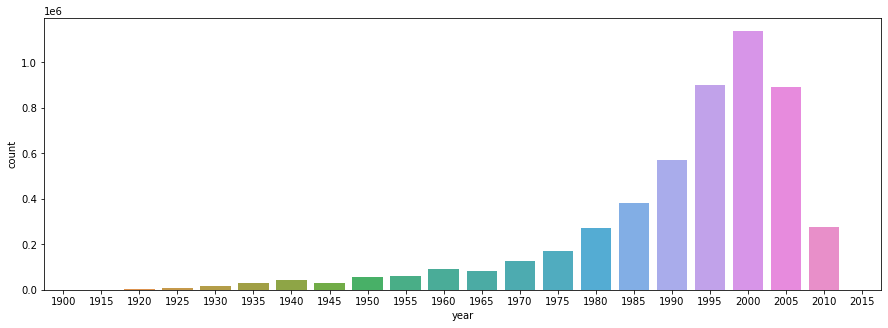

In [30]:
# 시각화 : 5년별 year 컬럼 플롯 시각화
plt.figure(figsize=(15,5))
sns.countplot(x=all_train['year'] // 5 * 5)
plt.show()

### genre

해당 영화의 장르 (하나의 영화는 여러 개의 장르를 가질 수 있음)

영화 장르는 총 18개 (결측치 없음)

한 영화(item)에 최소 1개 이상의 장르(genre)가 존재 (최대 10개)

In [31]:
print('고유 genre_data item 수:',genre_data.item.nunique())
print('고유 genre_data genre 수:',genre_data.genre.nunique())

고유 genre_data item 수: 6807
고유 genre_data genre 수: 18


In [32]:
# 모든 영화(item)에 장르(genre)가 존재하는지 확인
set(all_train.item) == set(genre_data.item)

True

In [33]:
# 총 장르 수
genre_data['genre'].nunique()

18

In [34]:
# 한 영화(item)당 장르(genre) 수
genre_data['item'].value_counts()

81132     10
26701      8
4719       7
2987       7
56152      7
          ..
27329      1
86852      1
103624     1
97673      1
8130       1
Name: item, Length: 6807, dtype: int64

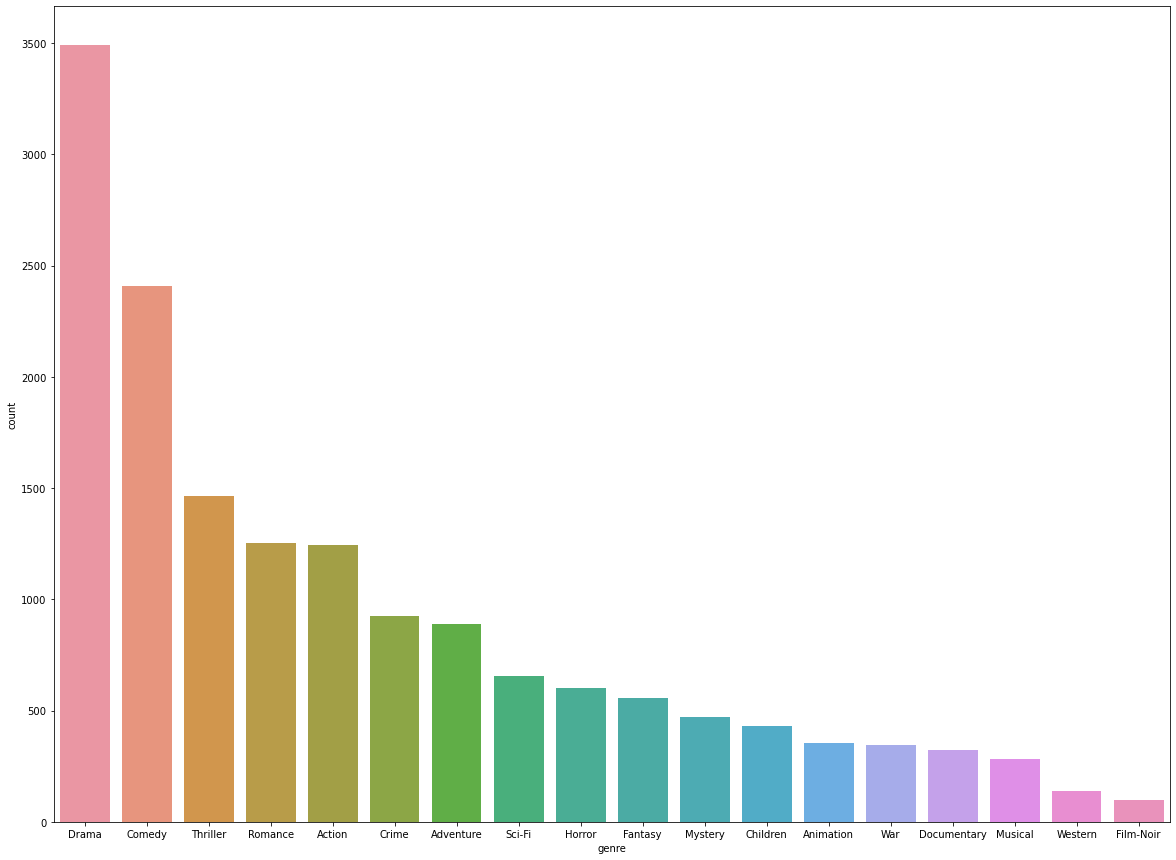

In [37]:
# 시각화 : genre별 등장 횟수 플롯 시각화
plt.figure(figsize=(20,15))
sns.countplot(x=genre_data['genre'],order = genre_data['genre'].value_counts().index)
plt.show()

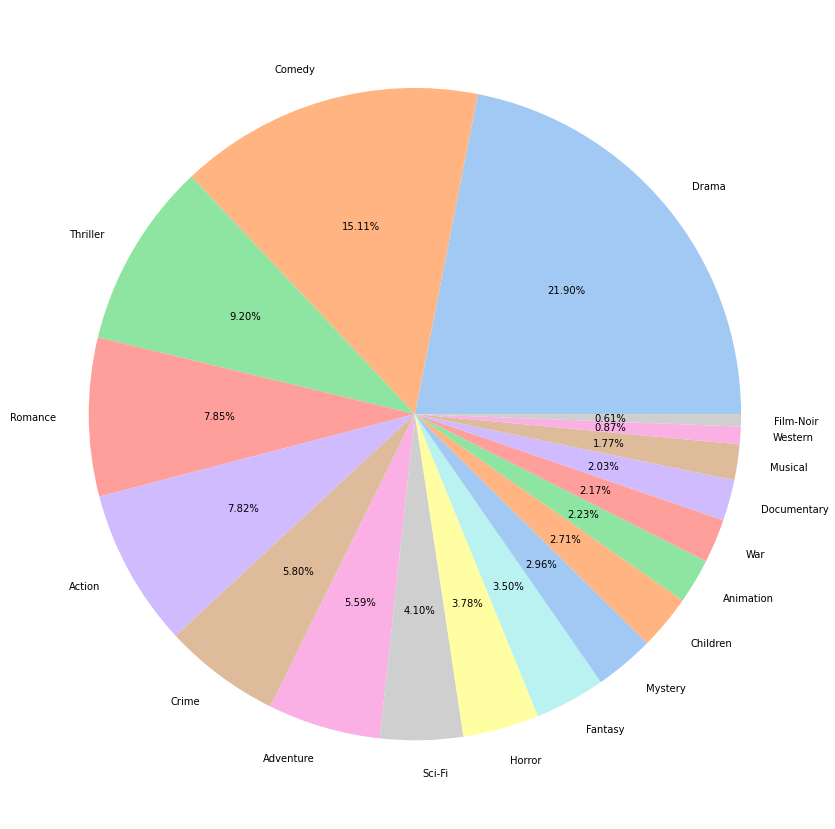

In [38]:
# 시각화 : genre별 등장 횟수 파이 시각화
plt.figure(figsize=(15,15))
labels, data = zip(*genre_data['genre'].value_counts().items())
plt.pie(data, labels = labels, colors = sns.color_palette('pastel'), autopct='%.2f%%')
plt.show()

### writer

해당 영화의 각본가(익명화) (하나의 영화는 여러 명의 각본가를 가질 수 있음)

각본가(writer)는 2989명, 각본가가 존재하는 영화는 5648건 (결측치 1159건)

한 영화(item)에 최소 1명 이상의 각본가(writer)가 존재 (최대 24명)

한 각본가(writer)는 최소 2개 이상의 영화(item)에 참여 (최대 47개)

각본가(writer)와 감독(director) 컬럼은 값을 공유함 (각본가와 감독이 같으면 동일한 값을 가짐)

In [39]:
print('고유 writer_data item 수:',writer_data.item.nunique())
print('고유 writer_data writer 수:',writer_data.writer.nunique())

고유 writer_data item 수: 5648
고유 writer_data writer 수: 2989


In [40]:
# 한 영화(item)당 각본가(writer) 참여 수
writer_data['item'].value_counts()

1907     24
783      23
364      21
2687     21
48322    19
         ..
79073     1
176       1
2560      1
42007     1
1237      1
Name: item, Length: 5648, dtype: int64

In [41]:
# 한 각본가(writer)당 영화(item) 참여 수
writer_data['writer'].value_counts()

nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm0414893     2
nm0414448     2
nm0414117     2
nm0414047     2
nm5927608     2
Name: writer, Length: 2989, dtype: int64

In [42]:
# 각본가(writer)가 없는 영화(id) 수
not_writer = set(all_train['item']) - set(writer_data['item'])
print('각본가(writer)가 없는 영화(id) 수:',len(not_writer))
df_not_writer = all_train[all_train['item'].isin(not_writer)][['item','title']].drop_duplicates().reset_index(drop=True)
df_not_writer

각본가(writer)가 없는 영화(id) 수: 1159


,item,title
0,170,Hackers (1995)
1,5151,40 Days and 40 Nights (2002)
2,33585,9 Songs (2004)
3,1225,Amadeus (1984)
4,59418,"American Crime, An (2007)"
...,...,...
1154,30,Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)
1155,79590,"Rebound, The (2009)"
1156,90524,Abduction (2011)
1157,75395,Frozen (2010)


### director

해당 영화 감독 (하나의 영화는 여러 명의 감독을 가질 수 있음)

감독이 존재하는 영화는 5503건, 감독은 1340명 (결측치 1304건)

한 영화(item)에 최소 1명 이상의 감독(director)이 존재 (최대 14명)

한 감독(director)이 최소 2개 이상의 영화(item)에 참여 (최대 44개)

각본가(writer)와 감독(director) 컬럼은 값을 공유함 (각본가와 감독이 같으면 동일한 값을 가짐)

In [43]:
print('고유 director_data item 수:',director_data.item.nunique())
print('고유 director_data director 수:',director_data.director.nunique())

고유 director_data item 수: 5503
고유 director_data director 수: 1340


In [44]:
# 한 영화(item)당 감독(director) 참여 수
director_data['item'].value_counts()

50912    14
1282     10
27002     8
7502      7
596       7
         ..
163       1
70        1
6566      1
5504      1
55768     1
Name: item, Length: 5503, dtype: int64

In [45]:
# 한 감독(director)당 영화(item) 참여 수
director_data['director'].value_counts()

nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0404606     2
nm0405605     2
nm0410139     2
nm0410769     2
nm9054338     2
Name: director, Length: 1340, dtype: int64

In [46]:
# 감독(director)이 없는 영화(id) 수
not_director = set(all_train['item']) - set(director_data['item'])
print('감독(director)이 없는 영화(id) 수:',len(not_director))
df_not_director = all_train[all_train['item'].isin(not_director)][['item','title']].drop_duplicates().reset_index(drop=True)
df_not_director

감독(director)이 없는 영화(id) 수: 1304


,item,title
0,1591,Spawn (1997)
1,2793,"American Werewolf in Paris, An (1997)"
2,33085,"Amityville Horror, The (2005)"
3,31184,Appleseed (Appurushîdo) (2004)
4,34338,"Aristocrats, The (2005)"
...,...,...
1299,82093,London Boulevard (2010)
1300,75395,Frozen (2010)
1301,842,Tales from the Crypt Presents: Bordello of Blood (1996)
1302,5999,Heavy Metal 2000 (2000)


### 장르 간 상관관계

# 상관관계 확인

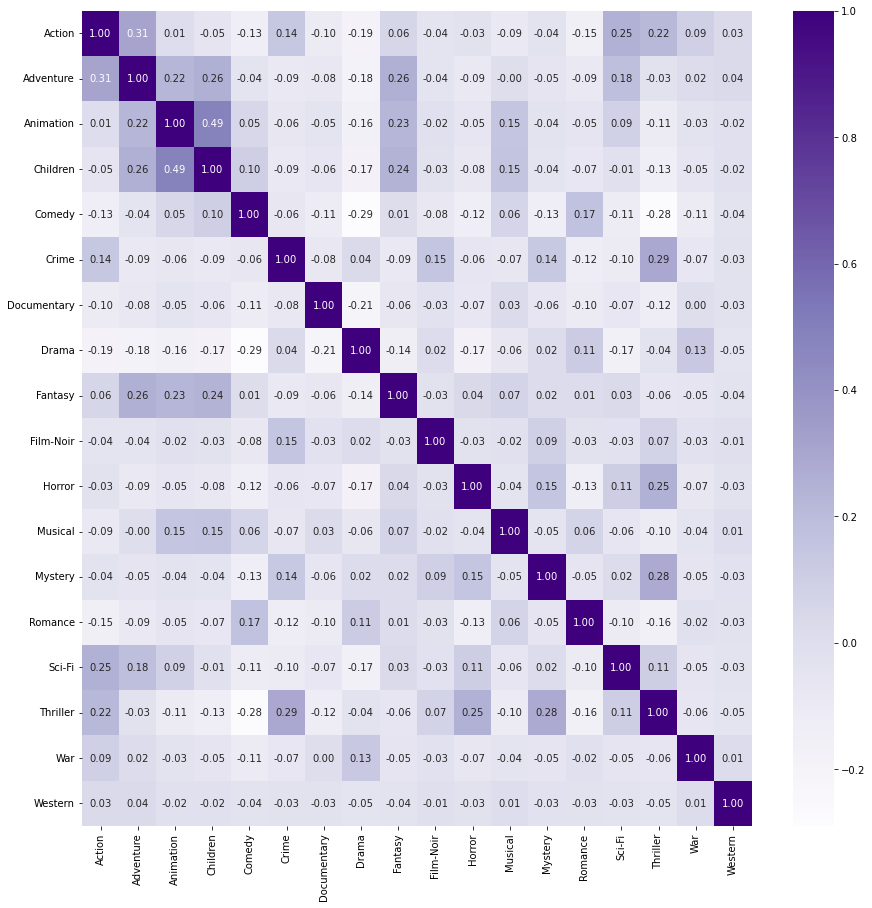

In [52]:
# 상관관계 확인
onehot_genre = genre_data.set_index('item')['genre'].str.get_dummies().sum(level=0).reset_index()
plt.figure(figsize=(15,15))
sns.heatmap(data = onehot_genre.iloc[:,1:].corr(), annot=True, fmt = '.2f', cmap='Purples')
plt.show()


애니메이션(Animation) - 어린이(Children)

어드벤쳐(Adventure) - 액션(Action)

범죄(Crime) - 스릴러(Thriller)

위 장르들은 비교적 높은 양의 상관관계를 가진 것을 확인할 수 있습니다. (두 장르가 함께 등장할 확률 높음)

그러나 위 사각화에서는 각 장르 간 관계의 방향이 나타나지 않았으므로 좀 더 확인이 필요할 것 같습니다.

ex)

범죄(Crime) 장르의 경우 51.6% 의 비율로 스릴러(Thriller)가 함께 등장하지만, 그 반대는 32.5% 로 줄어듭니다.

## 시간에 따른 장르 변화

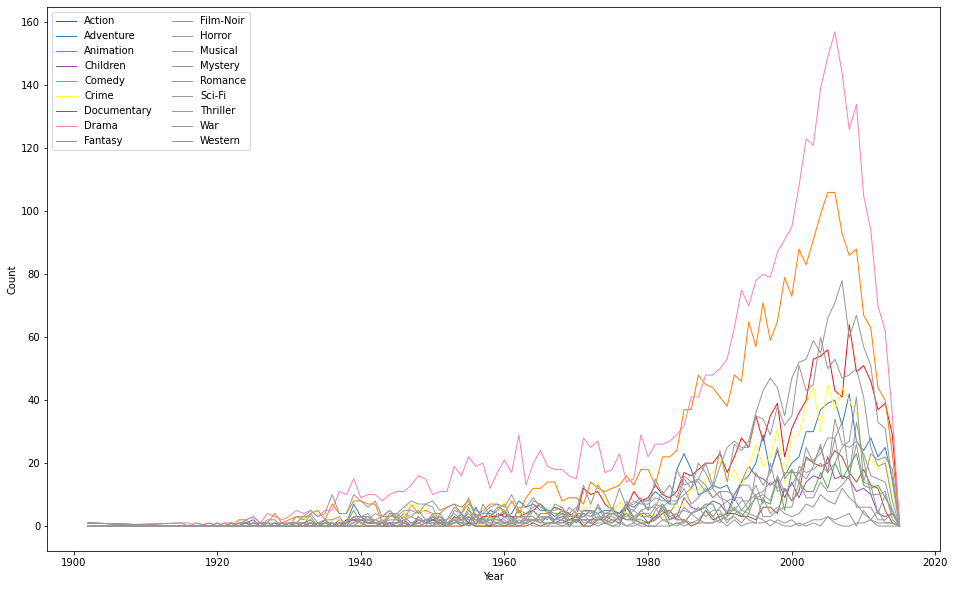

In [53]:
merge_year_genre = pd.merge(pd.concat([year_data,df_add_year]),genre_data)
merge_year_genre = merge_year_genre.set_index('year')['genre'].str.get_dummies().sum(level=0).sort_index().reset_index()

plt.figure(figsize=(16,10)) 
 
for num,column in enumerate(merge_year_genre.drop('year', axis=1)):
    plt.plot(merge_year_genre['year'], merge_year_genre[column],
             color=plt.get_cmap('Set1')(num), linewidth=1, label=column)

plt.legend(loc=2, ncol=2)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

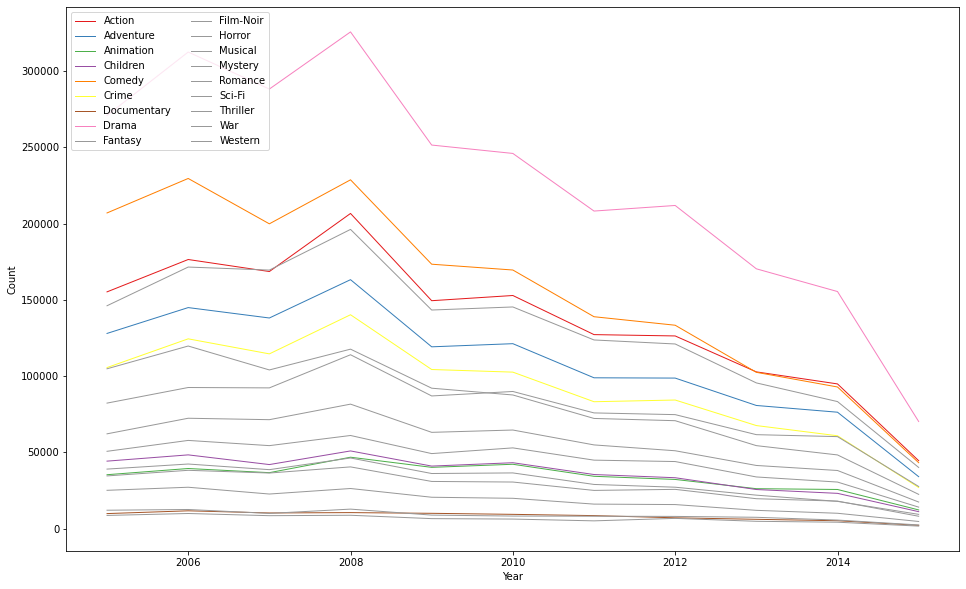

In [54]:
merge_time_year_genre = pd.merge(all_train[['item','time_year']],onehot_genre)
merge_time_year_genre = merge_time_year_genre.iloc[:,1:].groupby('time_year').sum().reset_index()

plt.figure(figsize=(16,10)) 
 
for num,column in enumerate(merge_time_year_genre.drop('time_year', axis=1)):
    plt.plot(merge_time_year_genre['time_year'], merge_time_year_genre[column],
             color=plt.get_cmap('Set1')(num), linewidth=1, label=column)

plt.legend(loc=2, ncol=2)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

드라마(Drama)는 연도와 상관없이 항상 1위

일부 장르는 연도별 순위 변동 있음

생각보다 연도와 장르는 큰 관계가 없어보입니다.

그렇다면 사용자 이력을 살펴볼까요?

## 사용자 이력, 개봉년도 비교

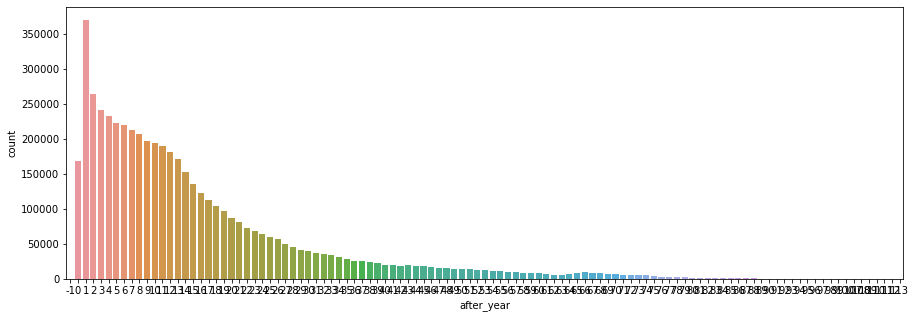

In [55]:
all_train['after_year'] = all_train['time_year'] - all_train['year']

# 플롯 시각화
plt.figure(figsize=(15,5))
sns.countplot(x=all_train['after_year'])
plt.show()

In [56]:
# 개봉 후 사용자가 interact 하기까지, 연도 차이가 많이 나는 순으로
all_train.sort_values(by = 'after_year', ascending=False)[:10]

,user,item,time,time_date,time_year,time_month,time_hour,time_day,title,year,after_year
4855551,29310,32898,1422765167,2015-02-01 04:32:47,2015,2,4,6,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855534,15030,32898,1420132115,2015-01-01 17:08:35,2015,1,17,3,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855656,108609,32898,1427541346,2015-03-28 11:15:46,2015,3,11,5,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855647,97744,32898,1422169511,2015-01-25 07:05:11,2015,1,7,6,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855588,59417,32898,1423736945,2015-02-12 10:29:05,2015,2,10,3,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855603,70035,32898,1424171936,2015-02-17 11:18:56,2015,2,11,1,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855548,28688,32898,1420472443,2015-01-05 15:40:43,2015,1,15,0,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855553,29707,32898,1427486239,2015-03-27 19:57:19,2015,3,19,4,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855577,49208,32898,1421347672,2015-01-15 18:47:52,2015,1,18,3,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113
4855612,76630,32898,1423334125,2015-02-07 18:35:25,2015,2,18,5,"Trip to the Moon, A (Voyage dans la lune, Le) (1902)",1902,113


In [57]:
# 연도 차이가 음수값?
all_train.sort_values(by = 'after_year')[:10]

,user,item,time,time_date,time_year,time_month,time_hour,time_day,title,year,after_year
4319348,124413,99007,1355791816,2012-12-18 00:50:16,2012,12,0,1,Warm Bodies (2013),2013,-1
4744970,81663,91535,1323223207,2011-12-07 02:00:07,2011,12,2,2,"Bourne Legacy, The (2012)",2012,-1
2060518,123609,89745,1316645274,2011-09-21 22:47:54,2011,9,22,2,"Avengers, The (2012)",2012,-1
4939359,63880,119145,1419022975,2014-12-19 21:02:55,2014,12,21,4,Kingsman: The Secret Service (2015),2015,-1
3146908,83046,68194,1258834242,2009-11-21 20:10:42,2009,11,20,5,"Damned United, The (2009)",2009,0
3146905,82459,68194,1259264744,2009-11-26 19:45:44,2009,11,19,3,"Damned United, The (2009)",2009,0
3146902,81637,68194,1255995234,2009-10-19 23:33:54,2009,10,23,0,"Damned United, The (2009)",2009,0
3146893,77671,68194,1258936657,2009-11-23 00:37:37,2009,11,0,0,"Damned United, The (2009)",2009,0
3146880,71326,68194,1256731067,2009-10-28 11:57:47,2009,10,11,2,"Damned United, The (2009)",2009,0
3146878,70346,68194,1259973835,2009-12-05 00:43:55,2009,12,0,5,"Damned United, The (2009)",2009,0


사용자 이력이 가장 많은 연도는 영화 개봉 후 1년 뒤

사용자 이력과 개봉년도 차이는 113년 부터 -1까지 (개봉년도 1902년도 ~ 2015년도)

영화 개봉 전, 이미 해당 영화에 대한 이력을 남긴 데이터 존재

개봉 전, 이미 사용자 이력이 존재하는 영화가 있는게 신기하네요..

혹시 사용자가 비공개 시사회에 참여한 걸까요? 🤔

어쩌면 제공된 데이터가 영화 시청이력이 아닐 수도 있을 것 같습니다.

한번 사용자 이력을 좀 더 살펴볼까요?

## 사용자별 활동 기간 확인

In [58]:
user_time = all_train[['user','time_date']]
user_time = pd.merge(user_time.groupby('user').min().reset_index(),user_time.groupby('user').max().reset_index(),on='user')
user_time.columns = ['user','time_min','time_max']

# 마지막 날짜 - 첫 날짜 간 시간 차 계산
user_time['time_delta'] = user_time['time_max'] - user_time['time_min']
user_time

,user,time_min,time_max,time_delta
0,11,2009-01-01 04:02:09,2011-01-12 01:35:59,740 days 21:33:50
1,14,2008-10-29 19:32:26,2008-10-29 22:49:10,0 days 03:16:44
2,18,2007-11-20 15:39:55,2010-09-02 11:15:40,1016 days 19:35:45
3,25,2010-07-01 05:20:18,2010-07-01 06:08:22,0 days 00:48:04
4,31,2015-02-23 23:17:13,2015-02-24 00:18:47,0 days 01:01:34
...,...,...,...,...
31355,138473,2010-05-19 01:27:04,2010-05-19 02:02:12,0 days 00:35:08
31356,138475,2005-09-15 19:07:30,2005-10-02 06:15:34,16 days 11:08:04
31357,138486,2008-04-01 18:32:53,2008-04-01 19:07:00,0 days 00:34:07
31358,138492,2005-05-05 12:36:32,2005-05-06 03:50:45,0 days 15:14:13


In [59]:
# 이력 횟수 확인
# 4분동안 50편??
user_time = pd.merge(user_time,pd.DataFrame(all_train['user'].value_counts().items(),columns=['user','count']))
user_time.sort_values(by='time_delta')[:10]

,user,time_min,time_max,time_delta,count
9479,41399,2005-09-20 22:50:33,2005-09-20 22:54:41,0 days 00:04:08,50
25817,113559,2014-11-04 22:21:06,2014-11-04 22:25:23,0 days 00:04:17,52
3471,15260,2015-01-01 22:52:59,2015-01-01 22:57:26,0 days 00:04:27,48
4598,20113,2015-03-05 17:48:49,2015-03-05 17:53:18,0 days 00:04:29,53
6519,28511,2015-02-18 02:10:16,2015-02-18 02:14:59,0 days 00:04:43,53
19361,84942,2014-11-14 14:30:38,2014-11-14 14:35:37,0 days 00:04:59,54
20310,88933,2014-12-07 23:55:33,2014-12-08 00:00:57,0 days 00:05:24,48
22630,99233,2005-04-24 19:10:33,2005-04-24 19:16:04,0 days 00:05:31,51
7144,31213,2014-12-07 11:23:00,2014-12-07 11:28:35,0 days 00:05:35,61
18568,81614,2015-01-23 00:57:49,2015-01-23 01:03:34,0 days 00:05:45,50


In [60]:
# 비정상 이력을 가진 사용자 로그 출력
sorted(all_train[all_train['user'] == 41399]['time_date'])

[Timestamp('2005-09-20 22:50:33'),
 Timestamp('2005-09-20 22:50:36'),
 Timestamp('2005-09-20 22:50:41'),
 Timestamp('2005-09-20 22:50:46'),
 Timestamp('2005-09-20 22:50:51'),
 Timestamp('2005-09-20 22:50:55'),
 Timestamp('2005-09-20 22:50:57'),
 Timestamp('2005-09-20 22:51:22'),
 Timestamp('2005-09-20 22:51:36'),
 Timestamp('2005-09-20 22:51:41'),
 Timestamp('2005-09-20 22:52:05'),
 Timestamp('2005-09-20 22:52:10'),
 Timestamp('2005-09-20 22:52:12'),
 Timestamp('2005-09-20 22:52:27'),
 Timestamp('2005-09-20 22:52:31'),
 Timestamp('2005-09-20 22:52:38'),
 Timestamp('2005-09-20 22:52:42'),
 Timestamp('2005-09-20 22:52:45'),
 Timestamp('2005-09-20 22:52:52'),
 Timestamp('2005-09-20 22:52:59'),
 Timestamp('2005-09-20 22:53:01'),
 Timestamp('2005-09-20 22:53:07'),
 Timestamp('2005-09-20 22:53:10'),
 Timestamp('2005-09-20 22:53:13'),
 Timestamp('2005-09-20 22:53:17'),
 Timestamp('2005-09-20 22:53:20'),
 Timestamp('2005-09-20 22:53:23'),
 Timestamp('2005-09-20 22:53:27'),
 Timestamp('2005-09-

In [61]:
# 비정상 이력을 사진 사용자 상위 10명의 영화 제목 확인
# 특정 영화들에 중복된 것 확인
all_train[all_train['user'].isin(user_time.sort_values(by='time_delta')[:10]['user'].tolist())]['title'].value_counts()

Usual Suspects, The (1995)          7
Inception (2010)                    7
Godfather, The (1972)               7
Shawshank Redemption, The (1994)    7
Dark Knight, The (2008)             6
                                   ..
Run Lola Run (Lola rennt) (1998)    1
Guardians of the Galaxy (2014)      1
Dark Knight Rises, The (2012)       1
District 9 (2009)                   1
Get Real (1998)                     1
Name: title, Length: 291, dtype: int64

In [62]:
# 활동기간이 0일 미만인 사용자 출력
user_time[user_time.time_delta.dt.days == 0].sort_values(by='count',ascending=False).reset_index()

,index,user,time_min,time_max,time_delta,count
0,20832,91349,2014-07-17 07:58:16,2014-07-17 13:47:47,0 days 05:49:31,1795
1,178,775,2005-04-18 03:38:25,2005-04-18 09:17:48,0 days 05:39:23,1139
2,23734,104063,2012-02-12 18:08:51,2012-02-12 23:08:56,0 days 05:00:05,966
3,5276,23055,2006-01-03 06:32:43,2006-01-03 13:05:55,0 days 06:33:12,913
4,27052,119055,2005-04-18 02:35:31,2005-04-18 06:55:21,0 days 04:19:50,789
...,...,...,...,...,...,...
11732,20320,88996,2012-10-25 06:55:50,2012-10-25 07:16:52,0 days 00:21:02,34
11733,8561,37385,2012-10-25 06:57:50,2012-10-25 07:15:49,0 days 00:17:59,34
11734,2528,11211,2012-07-18 23:52:06,2012-07-19 00:06:41,0 days 00:14:35,32
11735,15643,68606,2015-02-27 05:44:00,2015-02-27 16:57:30,0 days 11:13:30,19
